In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file path
filepath = "../imbd_dataset/Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
# Replacing NaN with unknown to clean df
df['age_certification'].fillna('unknown', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [7]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [8]:
selected_col = ["index", "title", "type", "description", "release_year", "age_certification", "runtime", "imdb_score", "imdb_votes"]
clean_df = filtered_df[selected_col].copy()

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5263 non-null   int64  
 1   title              5263 non-null   object 
 2   type               5263 non-null   object 
 3   description        5263 non-null   object 
 4   release_year       5263 non-null   int64  
 5   age_certification  5263 non-null   object 
 6   runtime            5263 non-null   int64  
 7   imdb_score         5263 non-null   float64
 8   imdb_votes         5263 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 411.2+ KB


IMDB Scores vs Release Years

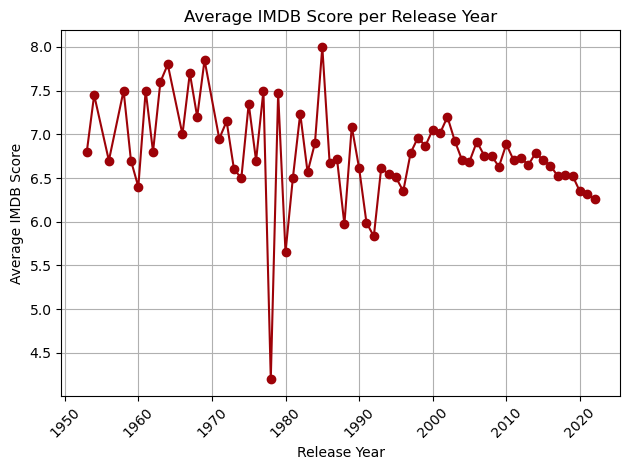

In [11]:
average_scores_per_year = clean_df.groupby("release_year")["imdb_score"].mean()

plt.plot(average_scores_per_year.index, average_scores_per_year.values, color="#9D0208", marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Average IMDB Score")
plt.title("Average IMDB Score per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)  
plt.show()

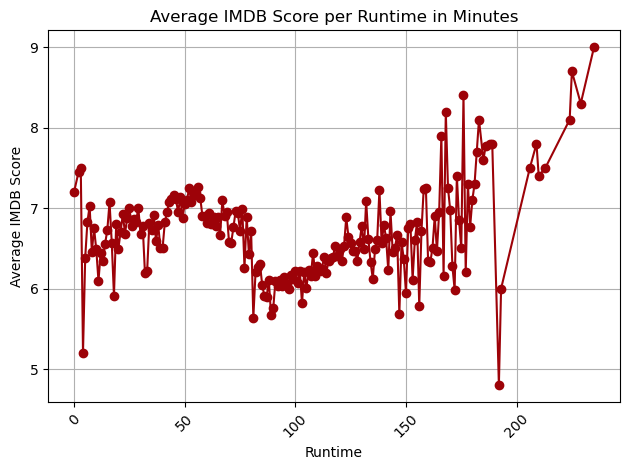

In [12]:
average_scores_per_runtime = clean_df.groupby("runtime")["imdb_score"].mean()

plt.plot(average_scores_per_runtime.index, average_scores_per_runtime.values, color="#9D0208", marker='o', linestyle='-')
plt.xlabel("Runtime")
plt.ylabel("Average IMDB Score")
plt.title("Average IMDB Score per Runtime in Minutes")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.grid(True) 
plt.show()

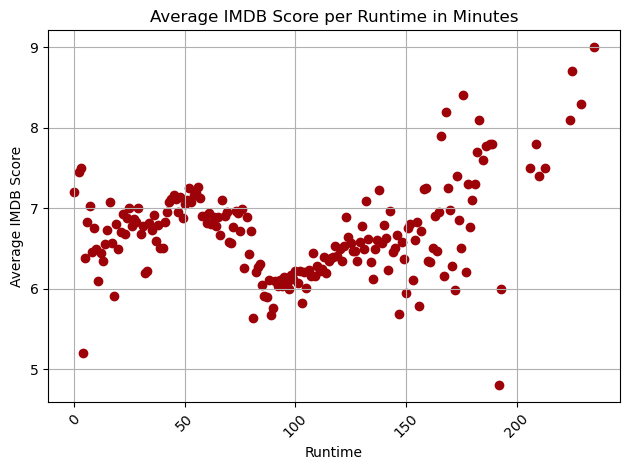

In [14]:
average_scores_per_runtime = clean_df.groupby("runtime")["imdb_score"].mean()

plt.scatter(average_scores_per_runtime.index, average_scores_per_runtime.values, color="#9D0208", marker='o')
plt.xlabel("Runtime")
plt.ylabel("Average IMDB Score")
plt.title("Average IMDB Score per Runtime in Minutes")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.grid(True) 
plt.show() 

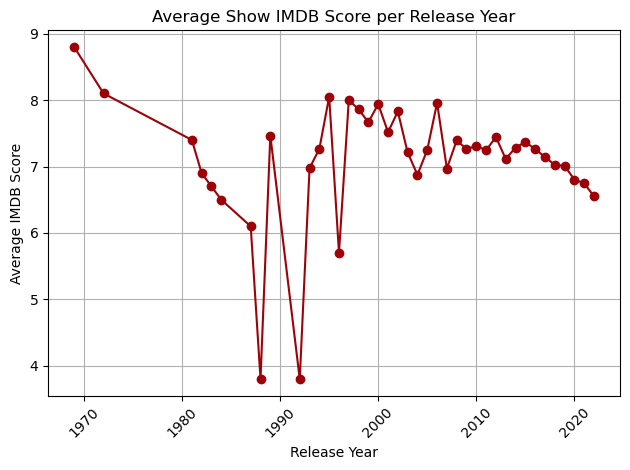

In [15]:
# Create df for shows
condition1 = (clean_df["type"] == "SHOW")

mask1 = clean_df[condition1]

filtered_df1 = mask1

#get average score per release year using filtered df
average_shows_scores_per_year = filtered_df1.groupby("release_year")["imdb_score"].mean()


plt.plot(average_shows_scores_per_year.index, average_shows_scores_per_year.values, color="#9D0208", marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Average IMDB Score")
plt.title("Average Show IMDB Score per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)  
plt.show()

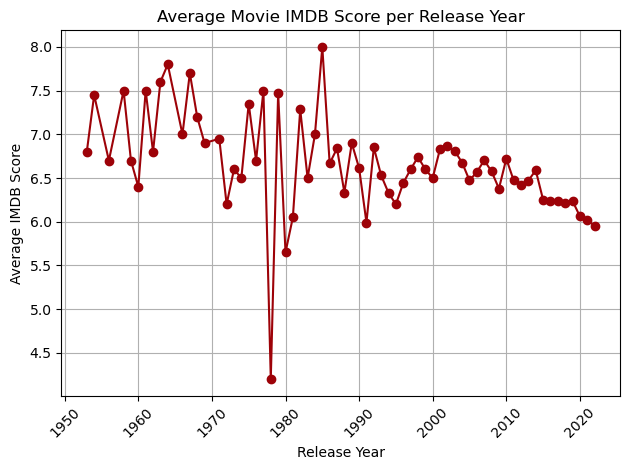

In [16]:
# Create df for movies
condition2 = (clean_df["type"] == "MOVIE")

mask2 = clean_df[condition2]

filtered_df2 = mask2

#get average score per release year using filtered df
average_movie_scores_per_year = filtered_df2.groupby("release_year")["imdb_score"].mean()

plt.plot(average_movie_scores_per_year.index, average_movie_scores_per_year.values, color="#9D0208", marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Average IMDB Score")
plt.title("Average Movie IMDB Score per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)  
plt.show()

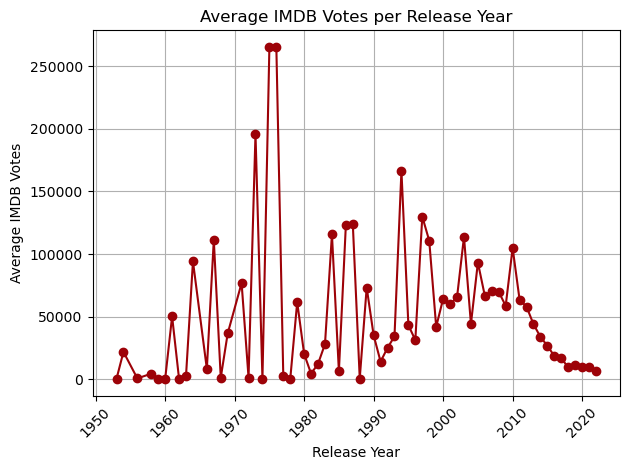

In [20]:
average_votes_per_year = clean_df.groupby("release_year")["imdb_votes"].mean()

plt.plot(average_votes_per_year.index, average_votes_per_year.values, color="#9D0208", marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Average IMDB Votes")
plt.title("Average IMDB Votes per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)  
plt.show()

In [ ]:
sns.jointplot(data=average_scores_per_year, x="Release Year", y=, hue="species")

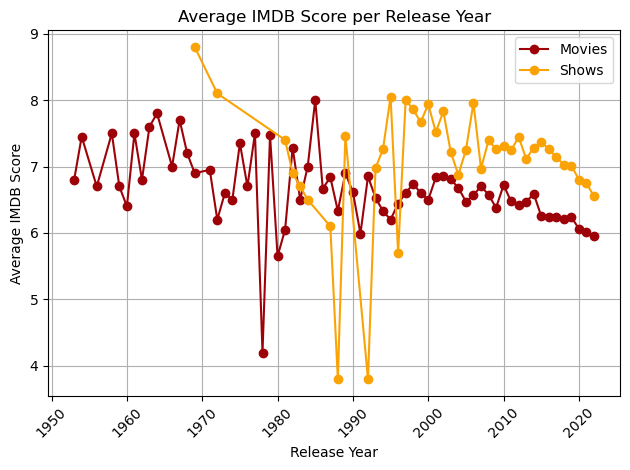

In [45]:
plt.plot(average_movie_scores_per_year.index, average_movie_scores_per_year.values, color="#9D0208", marker='o', linestyle='-', label="Movies")
plt.plot(average_shows_scores_per_year.index, average_shows_scores_per_year.values, color="#FAA307", marker='o', linestyle='-', label="Shows")

plt.xlabel("Release Year")
plt.ylabel("Average IMDB Score")
plt.title("Average IMDB Score per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)
plt.legend()
plt.show()

C:\Users\rober\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rober\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


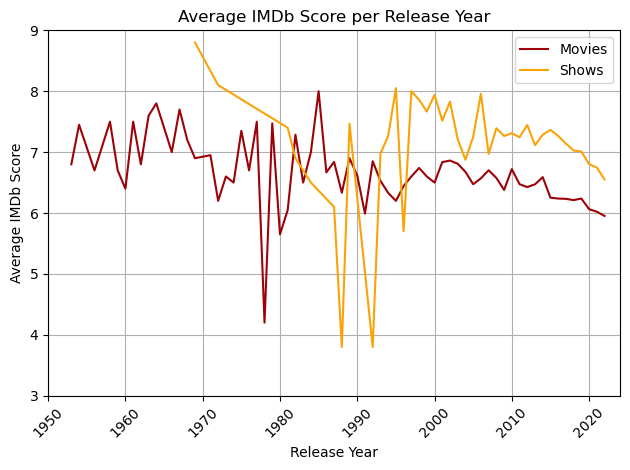

In [50]:
movies_df = pd.DataFrame({
    "Release Year": average_movie_scores_per_year.index,
    "Average IMDb Score": average_movie_scores_per_year.values,
    "Type": "Movies"
})

# Create a DataFrame for shows
shows_df = pd.DataFrame({
    "Release Year": average_shows_scores_per_year.index,
    "Average IMDb Score": average_shows_scores_per_year.values,
    "Type": "Shows"
})

# Concatenate the DataFrames
combined_df = pd.concat([movies_df, shows_df])

# Create a seaborn line plot
sns.lineplot(data=combined_df, x="Release Year", y="Average IMDb Score", hue="Type", palette={"Movies": "#9D0208", "Shows": "#FAA307"})

# Set labels and title
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.title("Average IMDb Score per Release Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlim(1950,2024)
plt.ylim(3,9)

# Show the legend
plt.legend()

# Show the plot
plt.show()

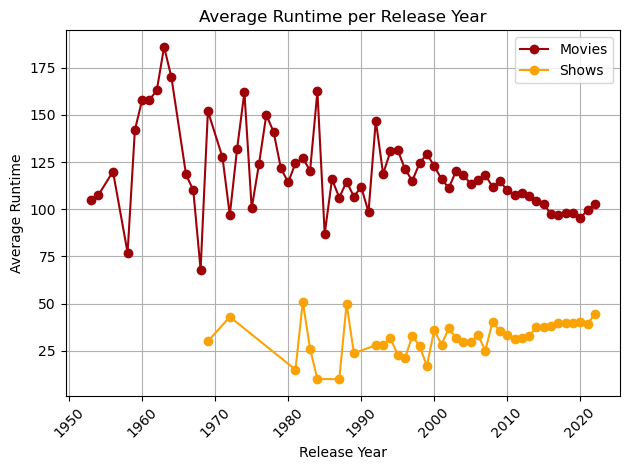

In [53]:
plt.plot(average_movie_runtime_per_year.index, average_movie_runtime_per_year.values, color="#9D0208", linestyle='-', label="Movies")
plt.plot(average_show_runtime_per_year.index, average_show_runtime_per_year.values, color="#FAA307", linestyle='-', label="Shows")

plt.xlabel("Release Year")
plt.ylabel("Average Runtime")
plt.title("Average Runtime per Release Year")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)
plt.legend()
plt.show()